In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
ch = xr.open_dataset('CHAD.nc')
ch

<xarray.Dataset>
Dimensions:   (datetime: 3653, lon: 44, lat: 66)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2011-01-01 2011-01-02 ... 2020-12-31
  * lon       (lon) float32 13.25 13.5 13.75 14.0 ... 23.25 23.5 23.75 24.0
  * lat       (lat) float32 23.75 23.5 23.25 23.0 22.75 ... 8.25 8.0 7.75 7.5
Data variables:
    crs       int32 ...
    precip    (datetime, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Fri Apr 28 10:37:00 2023: cdo mergetime PERSIANN_Chad_2023-...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [3]:
ad= ch.where(ch !=-99.0)
ad

<xarray.Dataset>
Dimensions:   (datetime: 3653, lat: 66, lon: 44)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2011-01-01 2011-01-02 ... 2020-12-31
  * lon       (lon) float32 13.25 13.5 13.75 14.0 ... 23.25 23.5 23.75 24.0
  * lat       (lat) float32 23.75 23.5 23.25 23.0 22.75 ... 8.25 8.0 7.75 7.5
Data variables:
    crs       float64 1.0
    precip    (datetime, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Fri Apr 28 10:37:00 2023: cdo mergetime PERSIANN_Chad_2023-...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [4]:
y=ad.precip.sel(lon=18.75 , lat=15.5)
y1=y.sel(datetime=slice('2011','2020'))
y1

<xarray.DataArray 'precip' (datetime: 3653)>
array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2011-01-01 2011-01-02 ... 2020-12-31
    lon       float32 18.75
    lat       float32 15.5
Attributes:
    grid_mapping:  crs

# QUESTION 1:Computing the monthly rainfall totals and computing their longterm climatologies for each month 

In [5]:
# Resampling to monthly time steps and calculating monthly totals
mon_totals = y1.resample(datetime='M').sum('datetime')
mon_totals 

<xarray.DataArray 'precip' (datetime: 120)>
array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.79999983e-01,
       8.06000042e+00, 1.63699989e+01, 1.10400000e+01, 1.65620010e+02,
       2.07500000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.18000007e+00, 8.89999986e-01,
       7.61999989e+00, 4.17599983e+01, 1.35240005e+02, 1.65850021e+02,
       5.70000052e-01, 4.25000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.94000006e+00, 0.00000000e+00, 0.00000000e+00, 3.48999977e+00,
       0.00000000e+00, 2.04399986e+01, 5.69000006e+00, 2.59429993e+02,
       1.91599998e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.46000004e+00, 0.00000000e+00,
       5.00000000e-01, 0.00000000e+00, 2.97100010e+01, 1.62550003e+02,
       8.36799927e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.30000004e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.70000000e+01, 1.63180008e+02,
       4.73100014e+01, 0.00000000e+00, 0.00000000e+00, 4.59000015e+00,
       9.90000010e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.39599953e+01, 1.03229996e+02, 7.45199966e+01,
       3.16599998e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.49999994e-01,
       3.09999990e+00, 5.36000013e+00, 9.84000015e+01, 1.41470001e+02,
       5.15000010e+00, 6.70000017e-01, 0.00000000e+00, 1.12000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.59999990e+00, 1.30480011e+02, 9.13799973e+01, 2.22089981e+02,
       4.04800034e+01, 0.00000000e+00, 6.29999995e-01, 0.00000000e+00,
       0.00000000e+00, 3.14000010e+00, 0.00000000e+00, 0.00000000e+00,
       7.79999971e-01, 5.28899994e+01, 1.21500008e+02, 2.26019989e+02,
       4.10999966e+00, 5.70600014e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.69999981e-01, 1.26349998e+02, 2.58919983e+02,
       1.28399994e+02, 3.13000011e+00, 0.00000000e+00, 0.00000000e+00],
      dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2011-01-31 2011-02-28 ... 2020-12-31
    lon       float32 18.75
    lat       float32 15.5

In [6]:
# Calculating monthly climatology (average of each month across all years)
climatology = mon_totals.groupby('datetime.month').mean('datetime')
climatology

<xarray.DataArray 'precip' (month: 12)>
array([2.9300001e-01, 3.1400001e-01, 3.8700002e-01, 5.3100002e-01,
       2.2660003e+00, 3.2202999e+01, 7.5953995e+01, 1.8396500e+02,
       3.8127003e+01, 6.5110002e+00, 6.3000001e-02, 5.7099998e-01],
      dtype=float32)
Coordinates:
    lon      float32 18.75
    lat      float32 15.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

# QUESTION 2:computing the annual totals and average across the country and Plotting a timeseries that provides information on the year-to-year changes and trends.


In [7]:
# Resample to annual time steps and calculate annual totals
annual_totals = y1.resample(datetime='y').sum('datetime')
annual_totals

<xarray.DataArray 'precip' (datetime: 10)>
array([222.42001, 358.36   , 310.15   , 277.9    , 252.30998, 264.36   ,
       255.62001, 487.66   , 465.5    , 517.57   ], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2011-12-31 2012-12-31 ... 2020-12-31
    lon       float32 18.75
    lat       float32 15.5

In [8]:
# Calculate the mean annual precipitation over the spatial dimensions (latitude and longitude)
annual_mean = annual_totals.groupby('datetime.year').mean('datetime')
annual_mean

<xarray.DataArray 'precip' (year: 10)>
array([222.42001, 358.36   , 310.15   , 277.9    , 252.30998, 264.36   ,
       255.62001, 487.66   , 465.5    , 517.57   ], dtype=float32)
Coordinates:
    lon      float32 18.75
    lat      float32 15.5
  * year     (year) int64 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020

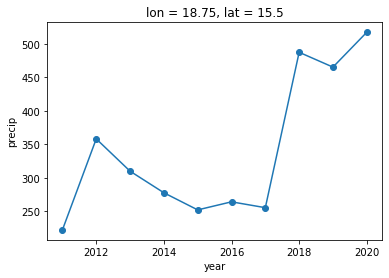

In [9]:
annual_mean.plot(marker='o')

In [10]:
y=ad.sel(lon=18.75 , lat=15.5)
ad1=y.sel(datetime=slice('2011','2020'))
ad1

<xarray.Dataset>
Dimensions:   (datetime: 3653)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2011-01-01 2011-01-02 ... 2020-12-31
    lon       float32 18.75
    lat       float32 15.5
Data variables:
    crs       float64 1.0
    precip    (datetime) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Fri Apr 28 10:37:00 2023: cdo mergetime PERSIANN_Chad_2023-...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

# QUESTION 3:Computing the number of dry (RR<1mm) and wet (RR>=1mm) days (per month and per year) for Chad and presenting a spatial and timeseries visualization of the output.

In [11]:
# Computing number of dry (RR<1mm) days
dry_days = ad1.where(ad1['precip'] < 1).precip  #count(dim='datetime')
dry_days

<xarray.DataArray 'precip' (datetime: 3653)>
array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2011-01-01 2011-01-02 ... 2020-12-31
    lon       float32 18.75
    lat       float32 15.5
Attributes:
    grid_mapping:  crs

In [12]:
# Computing number of wet (RR>=1mm) days
wet_days = ad1.where(ad1['precip'] >= 1).precip #count(dim='datetime')
wet_days

<xarray.DataArray 'precip' (datetime: 3653)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2011-01-01 2011-01-02 ... 2020-12-31
    lon       float32 18.75
    lat       float32 15.5
Attributes:
    grid_mapping:  crs

In [13]:
# Computing monthly and annual dry and wet days
mon_dry_days = dry_days.resample(datetime='M').sum('datetime')
mon_wet_days = wet_days.resample(datetime='M').sum('datetime')
annual_dry_days = dry_days.resample(datetime='Y').sum('datetime')
annual_wet_days = wet_days.resample(datetime='Y').sum('datetime')

In [14]:
mondry_mean = dry_days.groupby('datetime.month').mean('datetime')
monwet_mean = wet_days.groupby('datetime.month').mean('datetime')

annualdry_mean = dry_days.groupby('datetime.year').mean('datetime')
annualwet_mean = wet_days.groupby('datetime.year').mean('datetime')

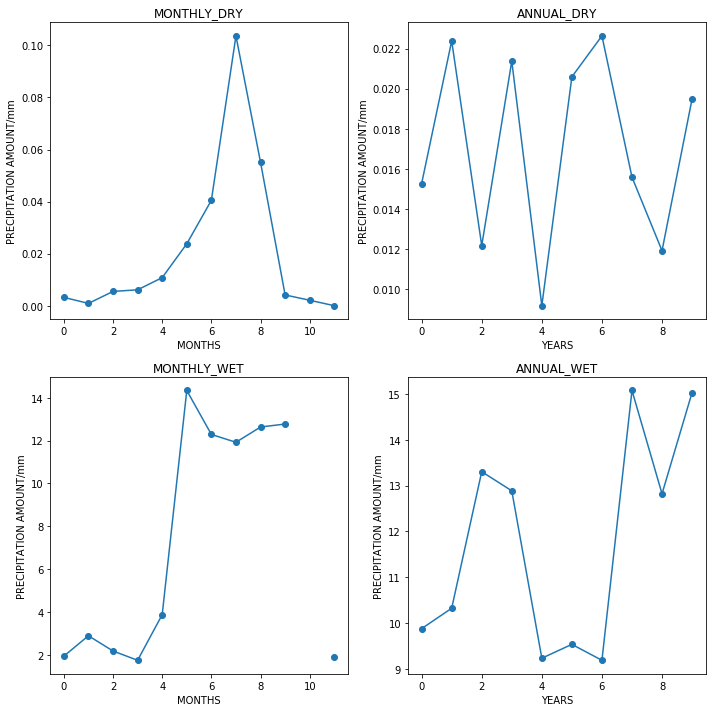

In [15]:
# Ploting timeseries of monthly and annual dry and wet days
fig, axs = plt.subplots(2, 2, figsize= (10,10)) 
axs[0, 0].plot(mondry_mean, marker='o') 
axs[0, 0].set_title("MONTHLY_DRY")
axs[0, 0].set_ylabel("PRECIPITATION AMOUNT/mm")
axs[0, 0].set_xlabel("MONTHS") 
axs[0, 1].plot(annualdry_mean, marker='o')
axs[0, 1].set_title("ANNUAL_DRY")
axs[0, 1].set_ylabel("PRECIPITATION AMOUNT/mm")
axs[0, 1].set_xlabel("YEARS")
axs[1, 0].plot(monwet_mean, marker='o')
axs[1, 0].set_title("MONTHLY_WET")
axs[1, 0].set_ylabel("PRECIPITATION AMOUNT/mm")
axs[1, 0].set_xlabel("MONTHS")
axs[1, 1].plot(annualwet_mean, marker='o')
axs[1, 1].set_title("ANNUAL_WET")
axs[1, 1].set_ylabel("PRECIPITATION AMOUNT/mm")
axs[1, 1].set_xlabel("YEARS")
fig.tight_layout() 

# spatial visualization of output

In [16]:
v= ch.where(ch !=-99.0)
v

<xarray.Dataset>
Dimensions:   (datetime: 3653, lat: 66, lon: 44)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2011-01-01 2011-01-02 ... 2020-12-31
  * lon       (lon) float32 13.25 13.5 13.75 14.0 ... 23.25 23.5 23.75 24.0
  * lat       (lat) float32 23.75 23.5 23.25 23.0 22.75 ... 8.25 8.0 7.75 7.5
Data variables:
    crs       float64 1.0
    precip    (datetime, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Fri Apr 28 10:37:00 2023: cdo mergetime PERSIANN_Chad_2023-...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [17]:
# Computing number of dry (RR<1mm) days
dry_days = v.where(v['precip'] < 1).precip#count(dim='datetime')
dry_days

<xarray.DataArray 'precip' (datetime: 3653, lat: 66, lon: 44)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2011-01-01 2011-01-02 ... 2020-12-31
  * lon       (lon) float32 13.25 13.5 13.75 14.0 ... 23.25 23.5 23.75 24.0
  * lat       (lat) float32 23.75 23.5 23.25 23.0 22.75 ... 8.25 8.0 7.75 7.5
Attributes:
    grid_mapping:  crs

In [18]:
# Computing number of wet (RR>=1mm) days
wet_days = v.where(v['precip'] >= 1).precip#count(dim='datetime')
wet_days

<xarray.DataArray 'precip' (datetime: 3653, lat: 66, lon: 44)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2011-01-01 2011-01-02 ... 2020-12-31
  * lon       (lon) float32 13.25 13.5 13.75 14.0 ... 23.25 23.5 23.75 24.0
  * lat       (lat) float32 23.75 23.5 23.25 23.0 22.75 ... 8.25 8.0 7.75 7.5
Attributes:
    grid_mapping:  crs

In [19]:
mondry_mean = dry_days.groupby('datetime.month').mean('datetime')
monwet_mean = wet_days.groupby('datetime.month').mean('datetime')

annualdry_mean = dry_days.groupby('datetime.year').mean('datetime')
annualwet_mean = wet_days.groupby('datetime.year').mean('datetime')

/home/yvette/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


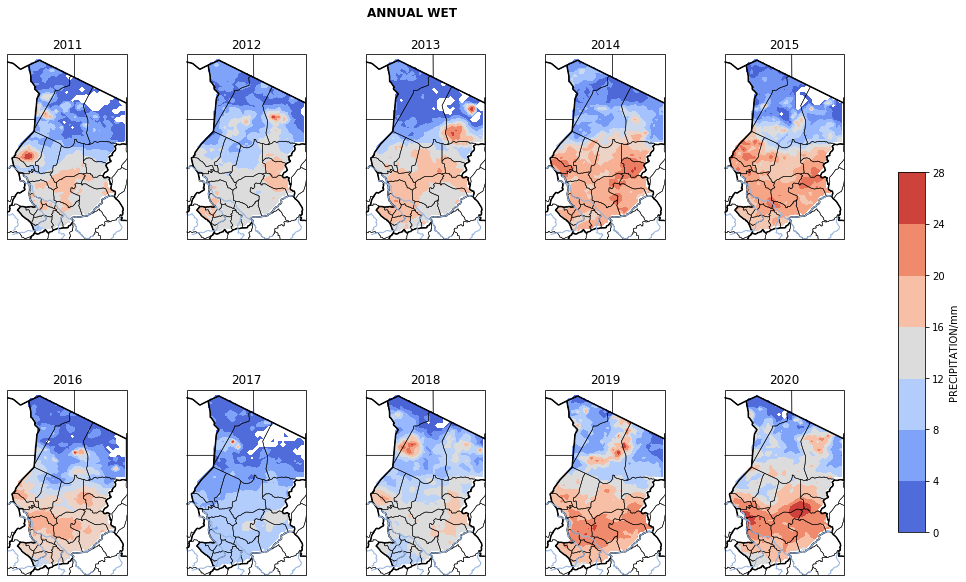

In [35]:
#spatial visualization for the annual wet days
fig,ax=plt.subplots(2,5,figsize=(15,10),
                   subplot_kw={'projection':ccrs.PlateCarree()})
ax=ax.flatten()
years=["2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"]
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=1.5)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([13,24,7,24])
    ax[i].set_title(years[i]),
    cb= ax[i].contourf(annualwet_mean.lon, annualwet_mean.lat, annualwet_mean[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.95,0.25,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='PRECIPITATION/mm')
fig.subplots_adjust(wspace=0.5,top=0.98)
plt.suptitle('ANNUAL WET', fontweight='bold')

plt.show();
    

/home/yvette/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


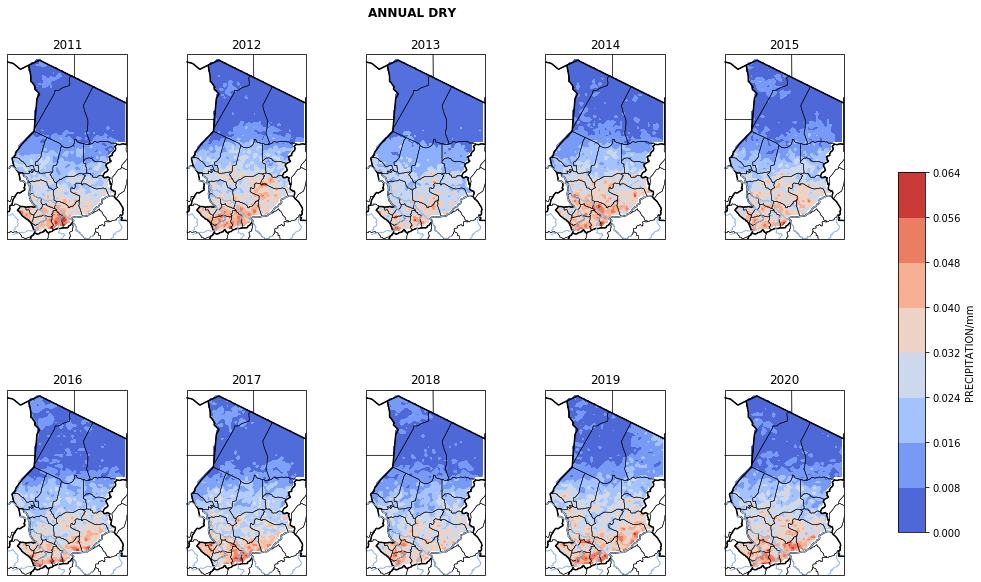

In [21]:
#spatial visualization for the annual dry days
fig,ax=plt.subplots(2,5,figsize=(15,10),
                   subplot_kw={'projection':ccrs.PlateCarree()})
ax=ax.flatten()
years=["2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"]
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=1.5)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([13,24,7,24])
    ax[i].set_title(years[i]),
    cb= ax[i].contourf(annualdry_mean.lon, annualdry_mean.lat, annualdry_mean[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.95,0.25,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='PRECIPITATION/mm')
fig.subplots_adjust(wspace=0.5,top=0.98)
plt.suptitle('ANNUAL DRY', fontweight='bold')

plt.show();
    

/home/yvette/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


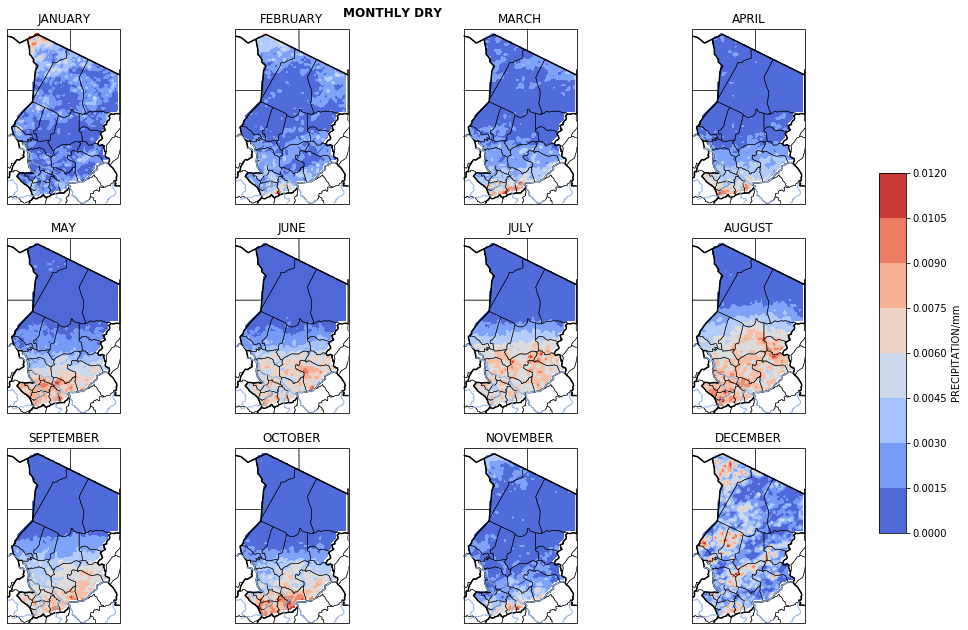

In [22]:
#spatial visualization for the monthly dry days
fig,ax=plt.subplots(3,4,figsize=(15,10),
                   subplot_kw={'projection':ccrs.PlateCarree()})
ax=ax.flatten()
names_of_months=["JANUARY","FEBRUARY","MARCH","APRIL","MAY","JUNE","JULY","AUGUST","SEPTEMBER","OCTOBER","NOVEMBER","DECEMBER"]
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=1.5)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([13,24,7,24])
    ax[i].set_title(names_of_months[i]),
    cb= ax[i].contourf(mondry_mean.lon, mondry_mean.lat, mondry_mean[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.95,0.25,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='PRECIPITATION/mm')
fig.subplots_adjust(wspace=0.5,top=0.95)
plt.suptitle('MONTHLY DRY', fontweight='bold')

plt.show()
    

/home/yvette/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


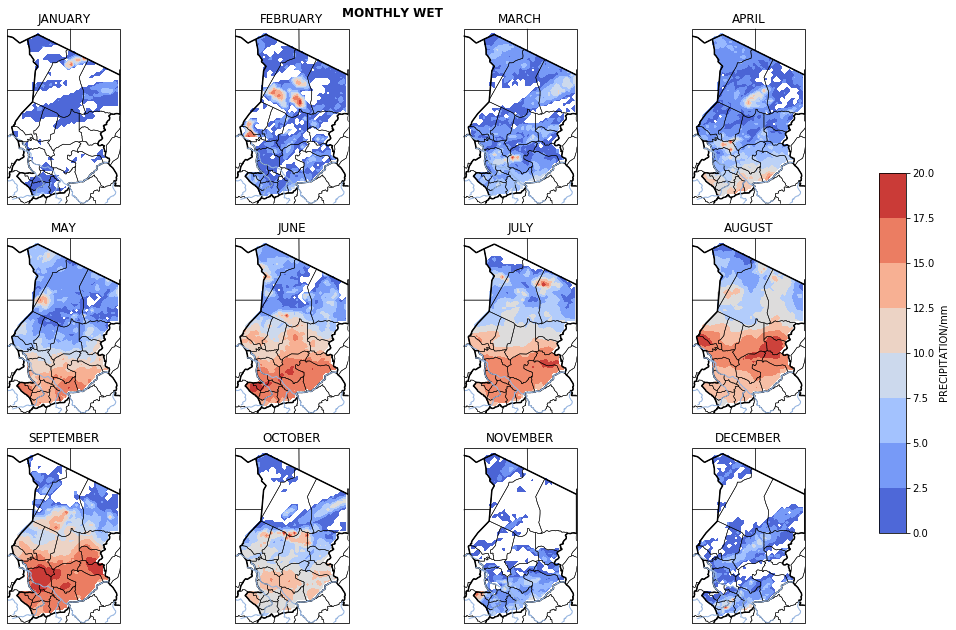

<Figure size 432x288 with 0 Axes>

In [23]:
#spatial visualization for the monthly wet days
fig,ax=plt.subplots(3,4,figsize=(15,10),
                   subplot_kw={'projection':ccrs.PlateCarree()})
ax=ax.flatten()
names_of_months=["JANUARY","FEBRUARY","MARCH","APRIL","MAY","JUNE","JULY","AUGUST","SEPTEMBER","OCTOBER","NOVEMBER","DECEMBER"]
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=1.5)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([13,24,7,24])
    ax[i].set_title(names_of_months[i]),
    cb= ax[i].contourf(monwet_mean.lon, monwet_mean.lat, monwet_mean[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.95,0.25,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='PRECIPITATION/mm')
fig.subplots_adjust(wspace=0.5,top=0.95)
plt.suptitle('MONTHLY WET', fontweight='bold')

plt.show()
plt.savefig('done.png');

# QUESTION 4:Computing the number of dry (RR>10mm) and wet (RR>20mm) days (per month and per year) for Chad for extreme rainfall indices and presenting a spatial and timeseries visualization of the output.

In [24]:
# Computing the number of dry (RR>10mm) days
extremedry_days = ad1.where(ad1['precip'] > 10).precip#count(dim='datetime')
extremedry_days

<xarray.DataArray 'precip' (datetime: 3653)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2011-01-01 2011-01-02 ... 2020-12-31
    lon       float32 18.75
    lat       float32 15.5
Attributes:
    grid_mapping:  crs

In [25]:
# Computing the number of wet (RR>20mm) days
extremewet_days = ad1.where(ad1['precip'] > 20).precip#count(dim='datetime')
extremewet_days

<xarray.DataArray 'precip' (datetime: 3653)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2011-01-01 2011-01-02 ... 2020-12-31
    lon       float32 18.75
    lat       float32 15.5
Attributes:
    grid_mapping:  crs

In [26]:
extreme_mondry_mean = extremedry_days.groupby('datetime.month').mean('datetime')
extreme_monwet_mean = extremewet_days.groupby('datetime.month').mean('datetime')

extreme_annualdry_mean = extremedry_days.groupby('datetime.year').mean('datetime')
extreme_annualwet_mean = extremewet_days.groupby('datetime.year').mean('datetime')

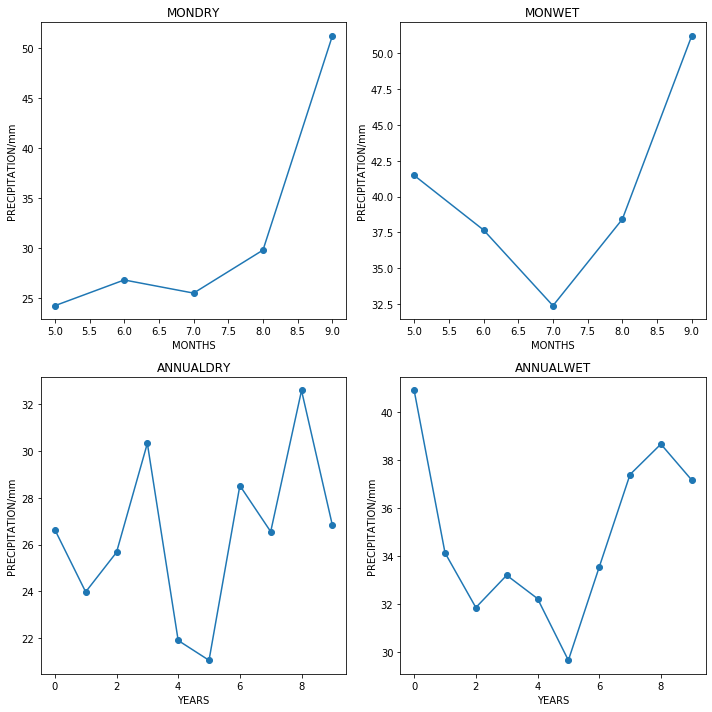

In [27]:
#timeseries visualization of output
fig, axs = plt.subplots(2, 2, figsize= (10,10)) 
axs[0, 0].plot(extreme_mondry_mean, marker='o') 
axs[0, 0].set_title("MONDRY")
axs[0, 0].set_ylabel("PRECIPITATION/mm")
axs[0, 0].set_xlabel("MONTHS")
axs[0, 1].plot(extreme_monwet_mean, marker='o') 
axs[0, 1].set_title("MONWET")
axs[0, 1].set_ylabel("PRECIPITATION/mm")
axs[0, 1].set_xlabel("MONTHS")
axs[1, 0].plot(extreme_annualdry_mean, marker='o')
axs[1, 0].set_title("ANNUALDRY")
axs[1, 0].set_ylabel("PRECIPITATION/mm")
axs[1, 0].set_xlabel("YEARS")
axs[1, 1].plot(extreme_annualwet_mean, marker='o')
axs[1, 1].set_title("ANNUALWET")
axs[1, 1].set_ylabel("PRECIPITATION/mm")
axs[1, 1].set_xlabel("YEARS")
fig.tight_layout() 

In [28]:
v= ch.where(ch !=-99.0)
v

<xarray.Dataset>
Dimensions:   (datetime: 3653, lat: 66, lon: 44)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2011-01-01 2011-01-02 ... 2020-12-31
  * lon       (lon) float32 13.25 13.5 13.75 14.0 ... 23.25 23.5 23.75 24.0
  * lat       (lat) float32 23.75 23.5 23.25 23.0 22.75 ... 8.25 8.0 7.75 7.5
Data variables:
    crs       float64 1.0
    precip    (datetime, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Fri Apr 28 10:37:00 2023: cdo mergetime PERSIANN_Chad_2023-...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [29]:
extremedry_days = v.where(v['precip'] > 10).precip#count(dim='datetime')
extremewet_days = v.where(v['precip'] > 20).precip#count(dim='datetime')
extremewet_days

<xarray.DataArray 'precip' (datetime: 3653, lat: 66, lon: 44)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2011-01-01 2011-01-02 ... 2020-12-31
  * lon       (lon) float32 13.25 13.5 13.75 14.0 ... 23.25 23.5 23.75 24.0
  * lat       (lat) float32 23.75 23.5 23.25 23.0 22.75 ... 8.25 8.0 7.75 7.5
Attributes:
    grid_mapping:  crs

In [30]:
extreme_mondry_mean = extremedry_days.groupby('datetime.month').mean('datetime')
extreme_monwet_mean = extremewet_days.groupby('datetime.month').mean('datetime')

extreme_annualdry_mean = extremedry_days.groupby('datetime.year').mean('datetime')
extreme_annualwet_mean = extremewet_days.groupby('datetime.year').mean('datetime')

/home/yvette/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


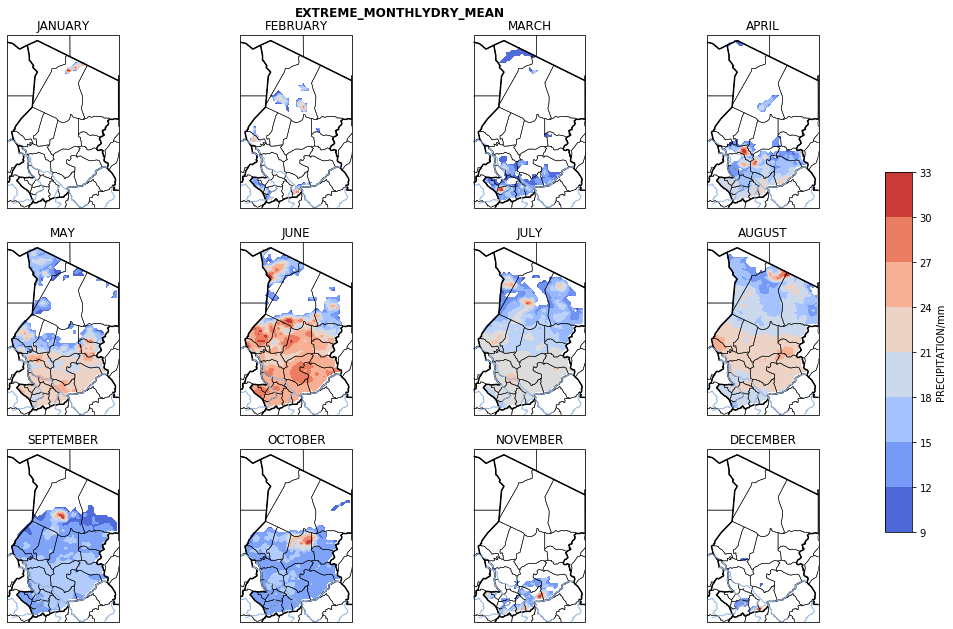

In [31]:
#spacial visualization of the extreme monthly dry case
fig,ax=plt.subplots(3,4,figsize=(15,10),
                   subplot_kw={'projection':ccrs.PlateCarree()})
ax=ax.flatten()
names_of_months=["JANUARY","FEBRUARY","MARCH","APRIL","MAY","JUNE","JULY","AUGUST","SEPTEMBER","OCTOBER","NOVEMBER","DECEMBER"]
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=1.5)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([13,24,7,24])
    ax[i].set_title(names_of_months[i]),
    cb= ax[i].contourf(extreme_mondry_mean.lon, extreme_mondry_mean.lat, extreme_mondry_mean[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.95,0.25,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='PRECIPITATION/mm')
fig.subplots_adjust(wspace=0.7,top=0.94)
plt.suptitle('EXTREME_MONTHLYDRY_MEAN', fontweight='bold')

plt.show()

/home/yvette/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


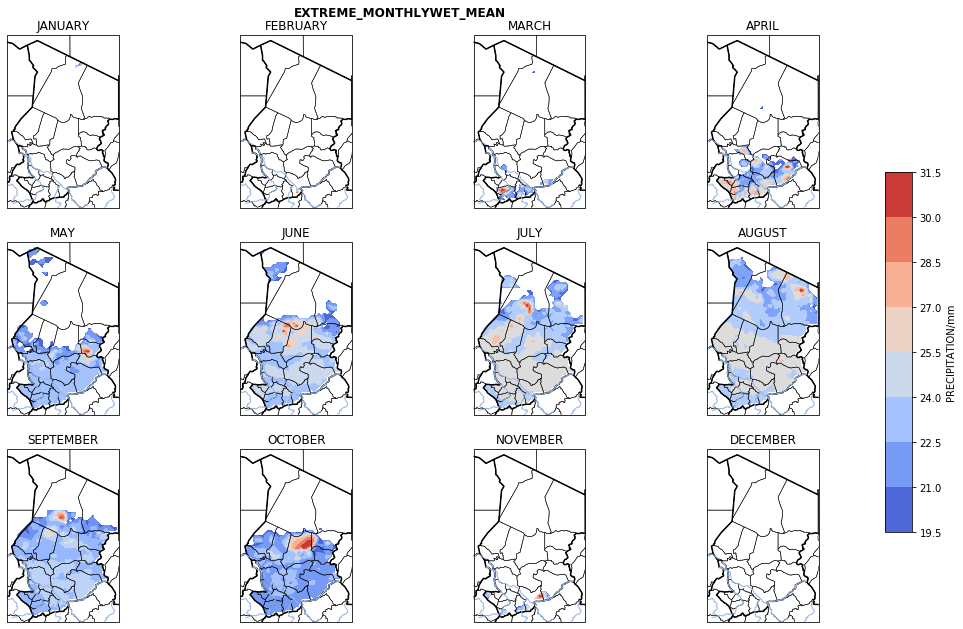

In [32]:
#spacial visualization of the extreme monthly wet case
fig,ax=plt.subplots(3,4,figsize=(15,10),
                   subplot_kw={'projection':ccrs.PlateCarree()})
ax=ax.flatten()
names_of_months=["JANUARY","FEBRUARY","MARCH","APRIL","MAY","JUNE","JULY","AUGUST","SEPTEMBER","OCTOBER","NOVEMBER","DECEMBER"]
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=1.5)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([13,24,7,24])
    ax[i].set_title(names_of_months[i]),
    cb= ax[i].contourf(extreme_monwet_mean.lon, extreme_monwet_mean.lat, extreme_monwet_mean[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.95,0.25,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='PRECIPITATION/mm')
fig.subplots_adjust(wspace=0.7,top=0.94)
plt.suptitle('EXTREME_MONTHLYWET_MEAN', fontweight='bold')

plt.show()

/home/yvette/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


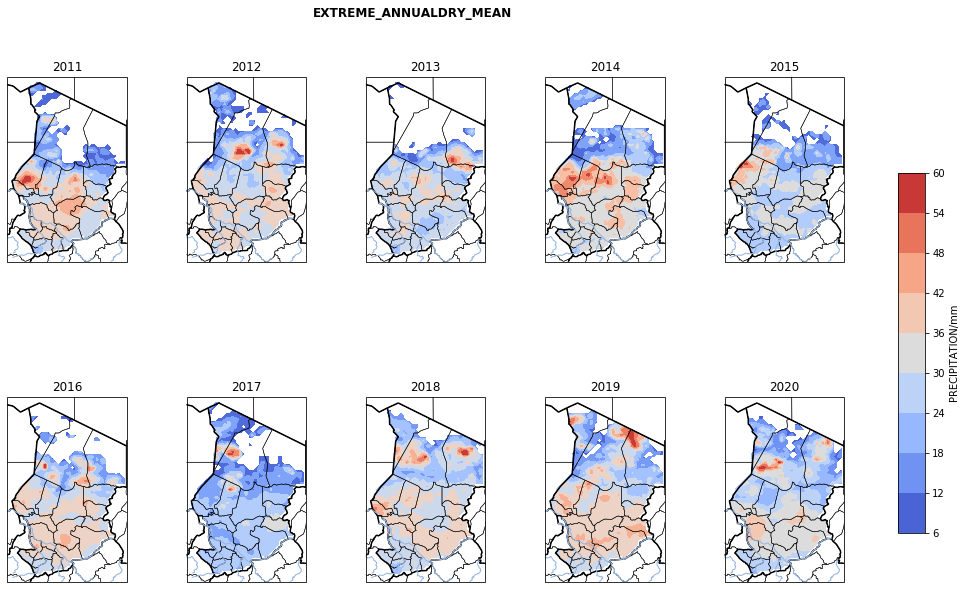

In [33]:
#spacial visualization of the extreme annual dry case
fig,ax=plt.subplots(2,5,figsize=(15,10),
                   subplot_kw={'projection':ccrs.PlateCarree()})
ax=ax.flatten()
years=["2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"]
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=1.5)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([13,24,7,24])
    ax[i].set_title(years[i]),
    cb= ax[i].contourf(extreme_annualdry_mean.lon, extreme_annualdry_mean.lat, extreme_annualdry_mean[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.95,0.25,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='PRECIPITATION/mm')
fig.subplots_adjust(wspace=0.5,top=0.94)
plt.suptitle('EXTREME_ANNUALDRY_MEAN', fontweight='bold')

plt.show()
    

/home/yvette/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


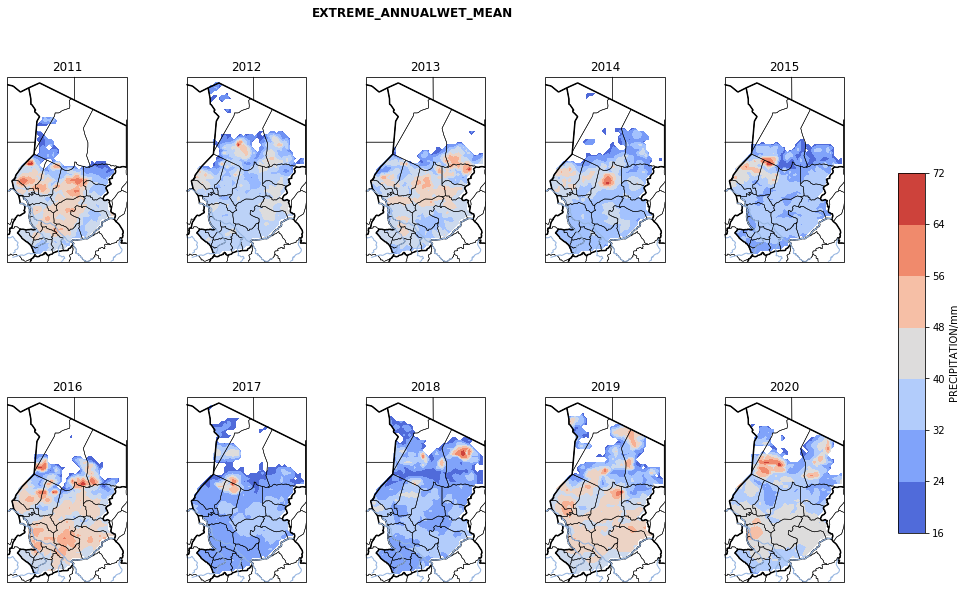

In [34]:
#spacial visualization of the extreme annual wet case
fig,ax=plt.subplots(2,5,figsize=(15,10),
                   subplot_kw={'projection':ccrs.PlateCarree()})
ax=ax.flatten()
years=["2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"]
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=1.5)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([13,24,7,24])
    ax[i].set_title(years[i]),
    cb= ax[i].contourf(extreme_annualwet_mean.lon, extreme_annualwet_mean.lat, extreme_annualwet_mean[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.95,0.25,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='PRECIPITATION/mm')
fig.subplots_adjust(wspace=0.5,top=0.94)
plt.suptitle('EXTREME_ANNUALWET_MEAN', fontweight='bold')

plt.show()
    